Problem 1:

If we list all the natural numbers below 10 that are multiples of 3 or 5, we get 3, 5, 6 and 9. The sum of these multiples is 23.

Find the sum of all the multiples of 3 or 5 below 1000.

In [4]:
import time
import matplotlib
from matplotlib import pyplot as plt

matplotlib.rcParams['font.sans-serif'] = "Times New Roman"

In [5]:
# Computes the sum of all numbers smaller than max_n,
# that are multiples of any of the numbers in multiples_list
def compute_sum_of_multiples(multiples_list, max_n, min_n=0):
    '''
    multiples_list : List of integers that are the multiples we want to check all integers against.
    
    max_n : The upper limit of the search range, not inclusive.
    min_n : The lower limit of the search range, inclusive.
    
    Therefore, search range is [min_n, max_n).
    '''
    # Record sum of appropriate integers.
    sum = 0
    
    # Loop over every integer in specified range.
    for n in range(int(min_n), int(max_n)):
        
        # Loop over multiples until test integer is a multiple.
        for multiple in multiples_list:
            # Check if test integer is a multiple
            if n % multiple == 0: 
                # Add integer to sum.
                sum+=n
                # Do not test subsequent multiples if test integer is a multiple of a previous multiple. 
                break
    return sum

In [6]:
# List of all max integers we want to test.
# Starting value is 1,000 (the value required in the problem).
n_max_list = [1*10**3]

# Now add larger integers of the format x*10^e such that
# we have values in the range 10,000 to 9,000,000.
for e in range(4,7):
    for n in range(1,10):
        n_max_list.append(n*10**e)

# Want to record computation time for each max integer
# Expect computation to be O(N)
computation_times = []

# The list of multiples we need to check
multiples = [3,5]

# Loop over list of max integers
for n_max in n_max_list:
    # Record start time
    start_time = time.time()
    # Perform calculation
    result = compute_sum_of_multiples(multiples, n_max)
    # Record end time
    end_time = time.time()
    # Print result and timing info
    print(f"Sum of all the multiples of any of {multiples} less than {n_max:,} = {result}, computed in {end_time - start_time:.6f}s")
    # Record computation time
    computation_times.append(end_time - start_time)

Sum of all the multiples of any of [3, 5] less than 1,000 = 233168, computed in 0.000000s
Sum of all the multiples of any of [3, 5] less than 10,000 = 23331668, computed in 0.000964s
Sum of all the multiples of any of [3, 5] less than 20,000 = 93316668, computed in 0.002480s
Sum of all the multiples of any of [3, 5] less than 30,000 = 209985000, computed in 0.003472s
Sum of all the multiples of any of [3, 5] less than 40,000 = 373326668, computed in 0.004960s
Sum of all the multiples of any of [3, 5] less than 50,000 = 583291668, computed in 0.006448s
Sum of all the multiples of any of [3, 5] less than 60,000 = 839970000, computed in 0.007441s
Sum of all the multiples of any of [3, 5] less than 70,000 = 1143321668, computed in 0.008958s
Sum of all the multiples of any of [3, 5] less than 80,000 = 1493266668, computed in 0.009394s
Sum of all the multiples of any of [3, 5] less than 90,000 = 1889955000, computed in 0.010912s
Sum of all the multiples of any of [3, 5] less than 100,000 = 2

<Figure size 432x288 with 0 Axes>

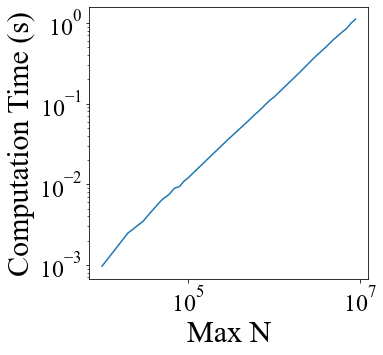

In [7]:
# Create plot of the computation time vs the max search integer.
# Plotted on a log log scale, the line appears straight,
# making the computation O(N)

plt.clf()
fig = plt.figure(figsize=(5,5))

# Plot all results except n=1,000 since the time recorded is 0.000000
plt.plot(n_max_list[1:], computation_times[1:])

plt.yscale('log')
plt.xscale('log')

plt.ylabel('Computation Time (s)', fontsize=30)
plt.xlabel('Max N', fontsize=30)

plt.tick_params(labelsize=24)

plt.show()